# Are there any specific app categories (e.g. communication, gaming, education) that tend to have more positive reviews than others, and what are the common features/columns that contribute to this trend? (Attribute: App Category)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
apps = pd.read_csv("C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore.csv")
reviews = pd.read_csv("C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore_user_reviews.csv")


In [2]:
# Remove missing data
apps.dropna(inplace=True)

# Remove duplicate data
apps.drop_duplicates(inplace=True)
reviews.dropna(inplace=True)
reviews.drop_duplicates(inplace=True)


In [3]:
# Merge the two datasets by app name
merged = pd.merge(apps, reviews, on='App')


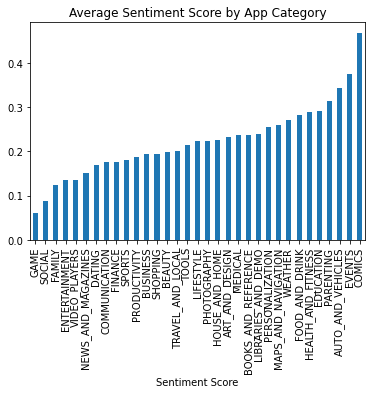

In [5]:
# Calculate the average sentiment score for each category
category_sentiment = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values()

# Plot the results
category_sentiment.plot(kind='bar')
plt.xlabel('Sentiment Score')
plt.title('Average Sentiment Score by App Category')
plt.show()


# To determine which features/columns contribute to this trend, we can analyze the most commonly mentioned words in the reviews for each category. We will use the nltk library to tokenize the reviews and find the most common words for each category:

In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [15]:
merged['Cleaned_Review'] = merged['Translated_Review'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else '')


In [16]:
# Find the most common words for each category
common_words = {}
for category in merged['Category'].unique():
    reviews = merged[merged['Category'] == category]['Cleaned_Review']
    words = nltk.word_tokenize(' '.join(list(reviews)))
    freq_dist = nltk.FreqDist(words)
    common_words[category] = [word for word, count in freq_dist.most_common(10)]

# Print the results
for category, words in common_words.items():
    print(category + ':', ', '.join(words))

ART_AND_DESIGN: love, good, like, app, color, pictures, make, great, free, game
FAMILY: game, like, love, good, get, play, fun, time, great, really
AUTO_AND_VEHICLES: great, app, car, get, good, like, test, love, would, easy
BEAUTY: good, love, bad, app, like, fake, best, ad, nice, amazing
BOOKS_AND_REFERENCE: books, app, read, love, book, kindle, great, update, good, like
BUSINESS: app, good, time, work, great, like, get, cant, phone, even
COMMUNICATION: app, like, cant, phone, new, time, good, open, firefox, work
COMICS: comics, great, dc, read, comic, love, way, easy, best, books
DATING: people, like, dating, good, app, time, get, im, free, cant
EDUCATION: good, app, language, learn, great, would, like, really, learning, love
ENTERTAINMENT: watch, like, app, ads, cant, love, time, get, even, shows
EVENTS: great, tickets, love, app, events, easy, good, prices, find, best
FINANCE: app, credit, card, great, time, account, pay, update, get, bank
FOOD_AND_DRINK: order, easy, recipes, lov

In [18]:
#Finally, we print the topics for each category, which can help us identify which features and aspects of the apps are most commonly discussed and which topics are most strongly associated with positive reviews in each category. By analyzing the topics and sentiments in the reviews, we can gain insights into which features and aspects of the apps are most important for driving positive user reviews in each category.